# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 18.01 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
!ls MNIST

processed  raw


In [5]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [6]:
#Normalizando
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

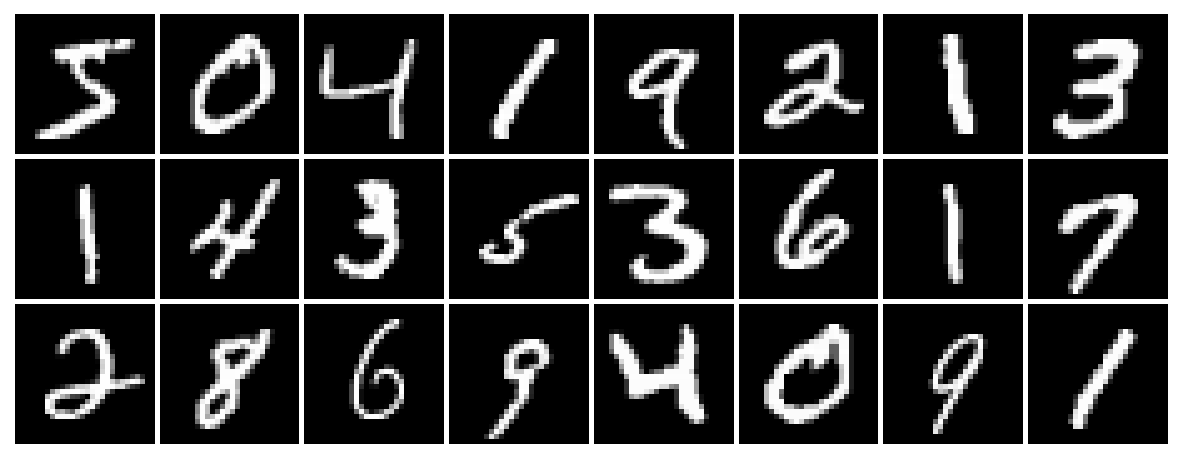

In [7]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


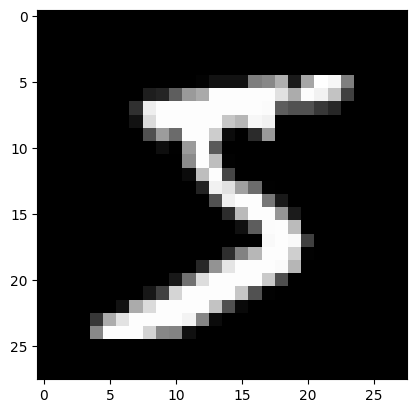

In [8]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

In [9]:
image

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

## Modelo

In [10]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

In [11]:
model.state_dict()

OrderedDict([('weight',
              tensor([[-0.0100, -0.0253, -0.0066,  ...,  0.0057, -0.0036,  0.0117],
                      [-0.0346, -0.0215, -0.0182,  ..., -0.0184, -0.0313,  0.0325],
                      [-0.0319, -0.0167,  0.0002,  ...,  0.0057, -0.0146, -0.0260],
                      ...,
                      [ 0.0153, -0.0137, -0.0233,  ...,  0.0116, -0.0356, -0.0199],
                      [ 0.0119,  0.0003, -0.0117,  ..., -0.0110, -0.0094,  0.0021],
                      [ 0.0024,  0.0169, -0.0355,  ...,  0.0059, -0.0297,  0.0273]])),
             ('bias',
              tensor([ 0.0348,  0.0122,  0.0232,  0.0047, -0.0022, -0.0197,  0.0191,  0.0127,
                       0.0167, -0.0350]))])

### Testando um predict com poucas amostras

In [12]:
pred = model(Variable(x_train))
pred

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28000x28 and 784x10)

In [13]:
x_train.view(-1,28*28).shape

torch.Size([1000, 784])

In [14]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[ 0.0443, -0.1036, -0.0393, -0.1209,  0.1152,  0.0099, -0.1088, -0.0182,
         -0.1041,  0.0484],
        [ 0.1458,  0.0820, -0.1724, -0.1061, -0.4371, -0.0877,  0.1619,  0.1243,
         -0.0597,  0.1545],
        [ 0.0890,  0.0047, -0.0788, -0.0474,  0.0064,  0.0123, -0.0666, -0.1201,
          0.2424,  0.1537],
        [ 0.0639, -0.0605,  0.1391,  0.0656,  0.0343, -0.2636, -0.0532,  0.0823,
         -0.0664, -0.0070],
        [-0.0091, -0.0167,  0.0078, -0.3272,  0.0747, -0.0612, -0.3067,  0.3110,
          0.1138,  0.2109]], grad_fn=<AddmmBackward0>)

In [15]:
import torch.nn.functional as F
prob = F.softmax(score, dim=1)
prob*100

tensor([[10.7138,  9.2413,  9.8552,  9.0831, 11.5009, 10.3523,  9.1936, 10.0649,
          9.2369, 10.7580],
        [11.6127, 10.8953,  8.4478,  9.0273,  6.4832,  9.1950, 11.8019, 11.3659,
          9.4560, 11.7148],
        [10.6567,  9.7953,  9.0107,  9.2973,  9.8121,  9.8693,  9.1210,  8.6460,
         12.4232, 11.3685],
        [10.6703,  9.4218, 11.5036, 10.6880, 10.3591,  7.6907,  9.4911, 10.8690,
          9.3667,  9.9397],
        [ 9.7366,  9.6629,  9.9024,  7.0836, 10.5881,  9.2426,  7.2304, 13.4099,
         11.0101, 12.1333]], grad_fn=<MulBackward0>)

In [16]:
max_prob, predicts = torch.max(prob, 1)
predicts

tensor([4, 6, 8, 2, 7])

## Treinamento

### Inicialização dos parâmetros

In [17]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [18]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.7 MB/s eta 0:00:00
  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-lqen3iwb
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-lqen3iwb
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=5036 sha256=83a8521084df7c1621d33a25d5ed763acfee3d34545f78041f4f8e1a617f18e4
  Stored in directory: /tmp/pip-ephem-wheel-cache-sm0bl62x/wheels/63/59/c1/3342e0bca82db7c512109b8da472d40be5c95cca7ce5363332
Successfully built torchviz


In [19]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.2801, grad_fn=<NllLossBackward0>)

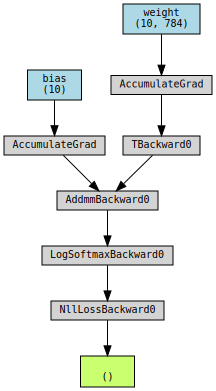

In [20]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

Epoch [1/100], Loss: 2.2801, Accuracy: 0.1150
weights: torch.Size([10, 784])
bias:    torch.Size([10])


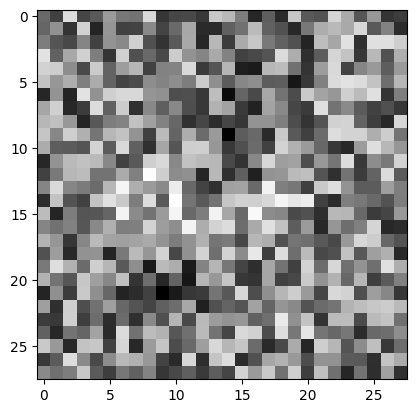

Epoch [2/100], Loss: 1.7823, Accuracy: 0.6550
weights: torch.Size([10, 784])
bias:    torch.Size([10])


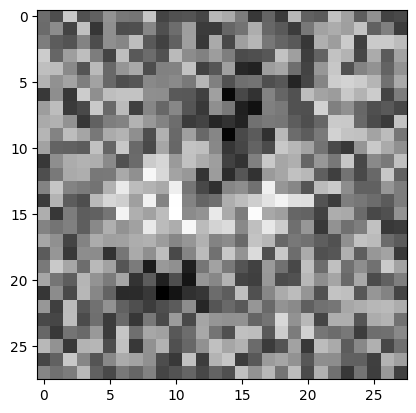

Epoch [3/100], Loss: 1.4528, Accuracy: 0.7510
weights: torch.Size([10, 784])
bias:    torch.Size([10])


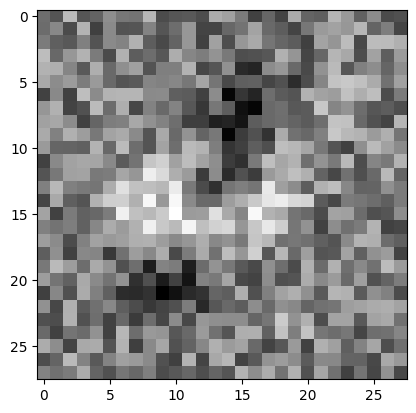

Epoch [4/100], Loss: 1.2366, Accuracy: 0.7830
weights: torch.Size([10, 784])
bias:    torch.Size([10])


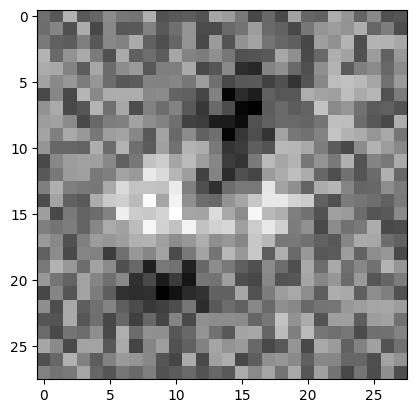

Epoch [5/100], Loss: 1.0896, Accuracy: 0.8000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


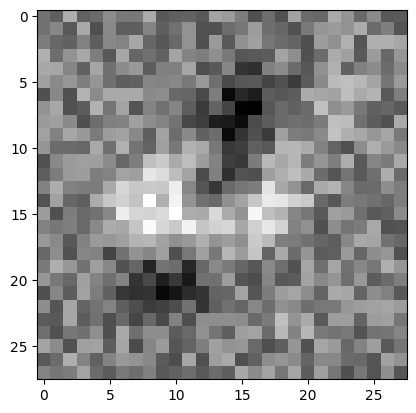

Epoch [6/100], Loss: 0.9841, Accuracy: 0.8150
weights: torch.Size([10, 784])
bias:    torch.Size([10])


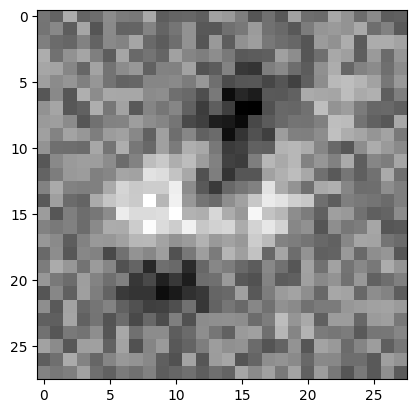

Epoch [7/100], Loss: 0.9051, Accuracy: 0.8280
weights: torch.Size([10, 784])
bias:    torch.Size([10])


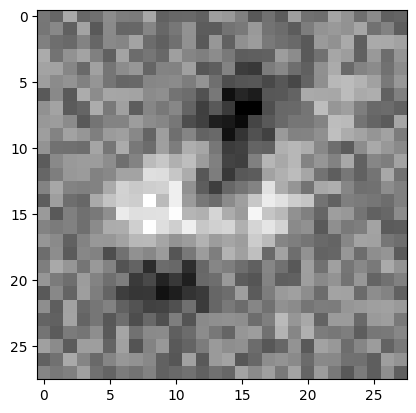

Epoch [8/100], Loss: 0.8434, Accuracy: 0.8350
weights: torch.Size([10, 784])
bias:    torch.Size([10])


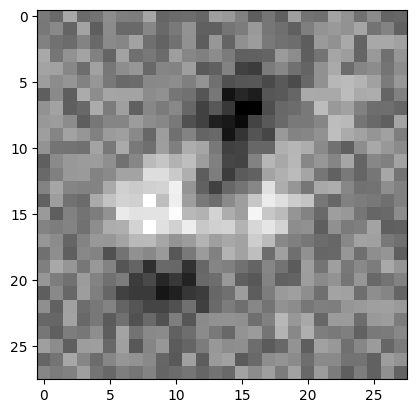

Epoch [9/100], Loss: 0.7938, Accuracy: 0.8420
weights: torch.Size([10, 784])
bias:    torch.Size([10])


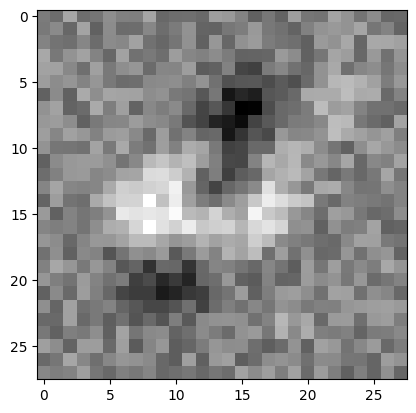

Epoch [10/100], Loss: 0.7528, Accuracy: 0.8440
weights: torch.Size([10, 784])
bias:    torch.Size([10])


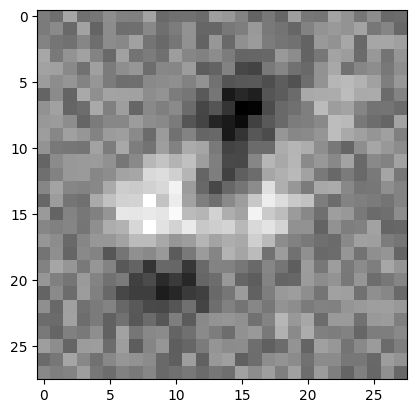

Epoch [11/100], Loss: 0.7183, Accuracy: 0.8520
weights: torch.Size([10, 784])
bias:    torch.Size([10])


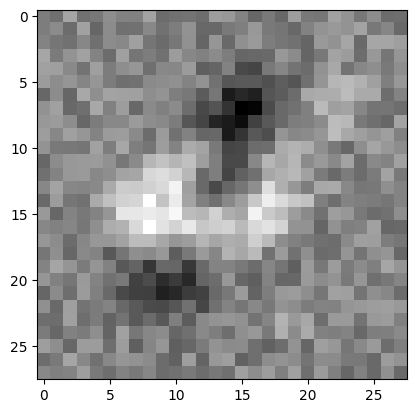

Epoch [12/100], Loss: 0.6886, Accuracy: 0.8560
weights: torch.Size([10, 784])
bias:    torch.Size([10])


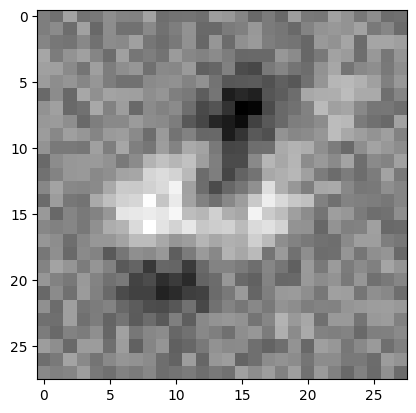

Epoch [13/100], Loss: 0.6629, Accuracy: 0.8610
weights: torch.Size([10, 784])
bias:    torch.Size([10])


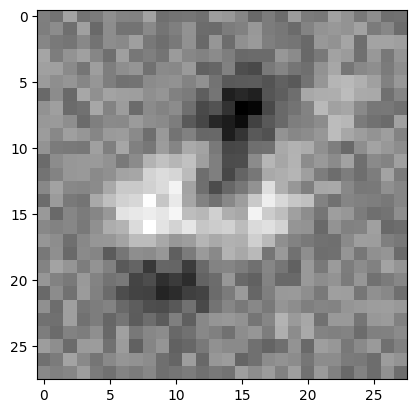

Epoch [14/100], Loss: 0.6402, Accuracy: 0.8660
weights: torch.Size([10, 784])
bias:    torch.Size([10])


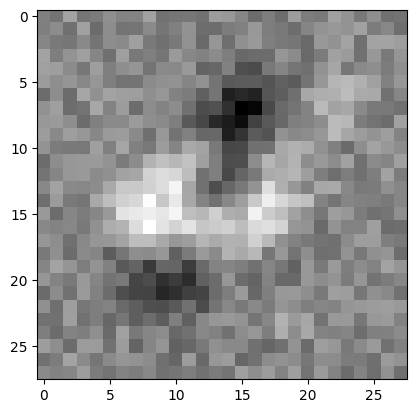

Epoch [15/100], Loss: 0.6200, Accuracy: 0.8680
weights: torch.Size([10, 784])
bias:    torch.Size([10])


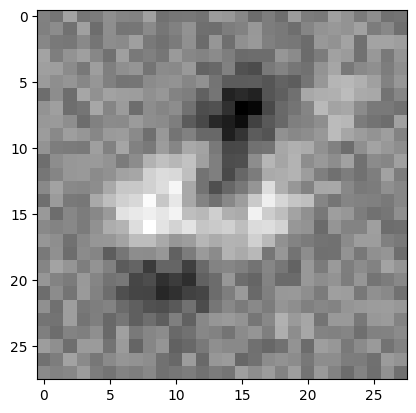

Epoch [16/100], Loss: 0.6019, Accuracy: 0.8710
weights: torch.Size([10, 784])
bias:    torch.Size([10])


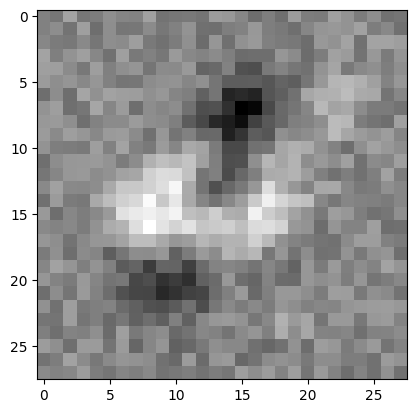

Epoch [17/100], Loss: 0.5856, Accuracy: 0.8740
weights: torch.Size([10, 784])
bias:    torch.Size([10])


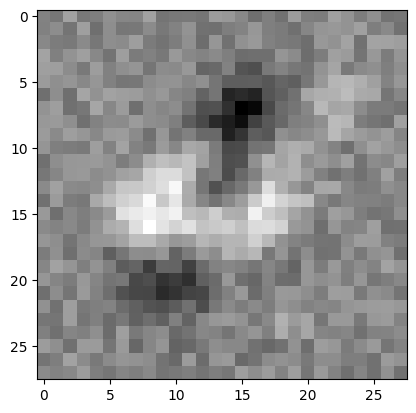

Epoch [18/100], Loss: 0.5707, Accuracy: 0.8750
weights: torch.Size([10, 784])
bias:    torch.Size([10])


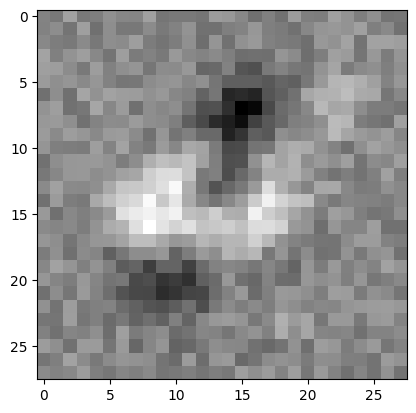

Epoch [19/100], Loss: 0.5570, Accuracy: 0.8760
weights: torch.Size([10, 784])
bias:    torch.Size([10])


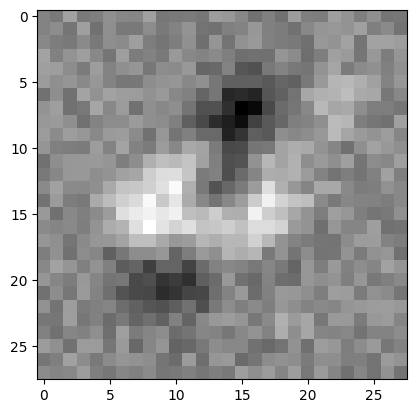

Epoch [20/100], Loss: 0.5445, Accuracy: 0.8800
weights: torch.Size([10, 784])
bias:    torch.Size([10])


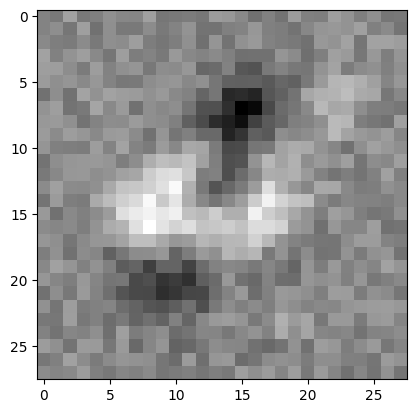

Epoch [21/100], Loss: 0.5328, Accuracy: 0.8850
weights: torch.Size([10, 784])
bias:    torch.Size([10])


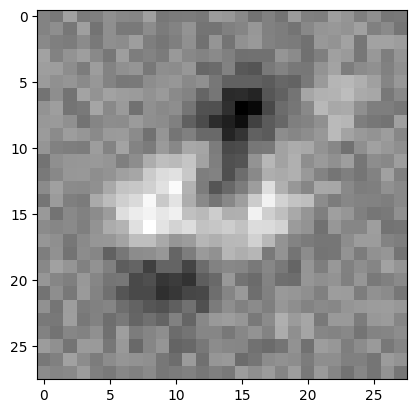

Epoch [22/100], Loss: 0.5220, Accuracy: 0.8860
weights: torch.Size([10, 784])
bias:    torch.Size([10])


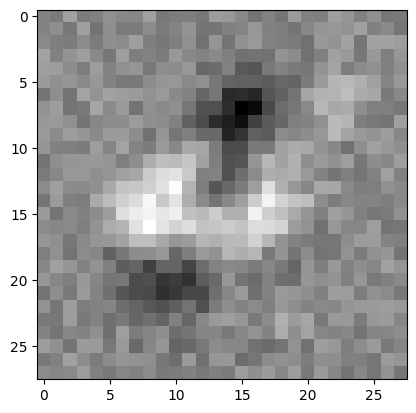

Epoch [23/100], Loss: 0.5120, Accuracy: 0.8890
weights: torch.Size([10, 784])
bias:    torch.Size([10])


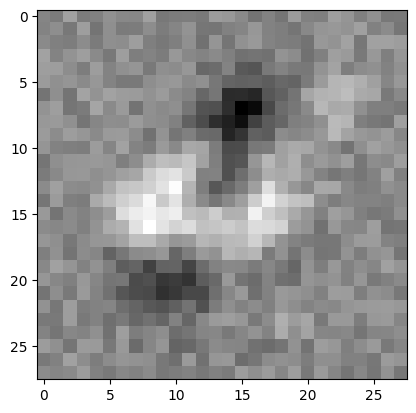

Epoch [24/100], Loss: 0.5025, Accuracy: 0.8890
weights: torch.Size([10, 784])
bias:    torch.Size([10])


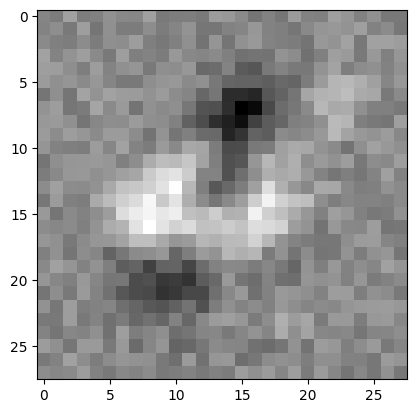

Epoch [25/100], Loss: 0.4937, Accuracy: 0.8890
weights: torch.Size([10, 784])
bias:    torch.Size([10])


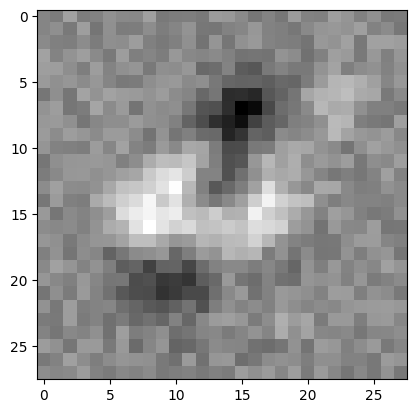

Epoch [26/100], Loss: 0.4854, Accuracy: 0.8910
weights: torch.Size([10, 784])
bias:    torch.Size([10])


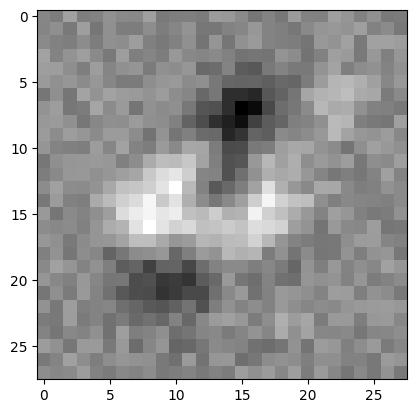

Epoch [27/100], Loss: 0.4775, Accuracy: 0.8920
weights: torch.Size([10, 784])
bias:    torch.Size([10])


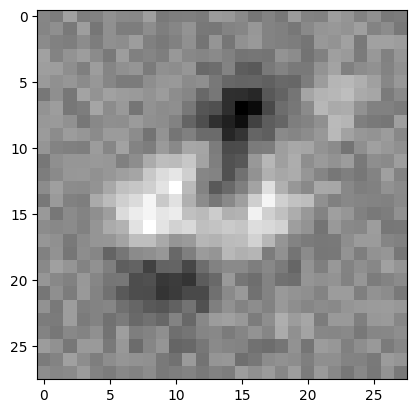

Epoch [28/100], Loss: 0.4701, Accuracy: 0.8960
weights: torch.Size([10, 784])
bias:    torch.Size([10])


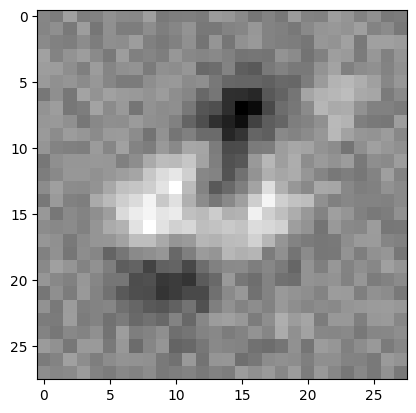

Epoch [29/100], Loss: 0.4630, Accuracy: 0.8980
weights: torch.Size([10, 784])
bias:    torch.Size([10])


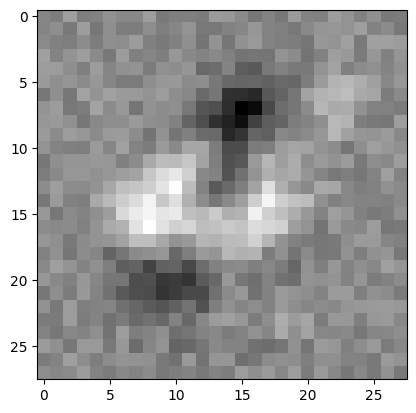

Epoch [30/100], Loss: 0.4563, Accuracy: 0.8980
weights: torch.Size([10, 784])
bias:    torch.Size([10])


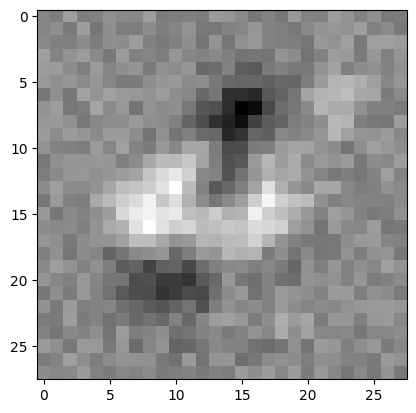

Epoch [31/100], Loss: 0.4499, Accuracy: 0.8990
weights: torch.Size([10, 784])
bias:    torch.Size([10])


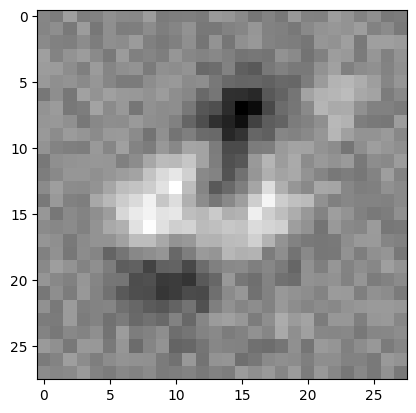

Epoch [32/100], Loss: 0.4438, Accuracy: 0.9000
weights: torch.Size([10, 784])
bias:    torch.Size([10])


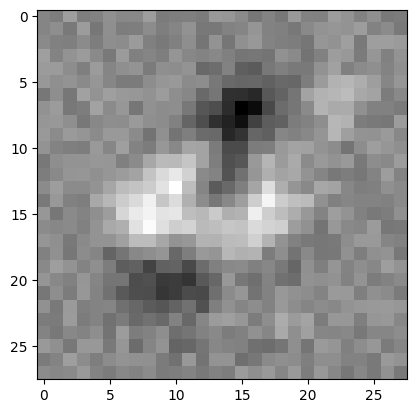

Epoch [33/100], Loss: 0.4380, Accuracy: 0.9010
weights: torch.Size([10, 784])
bias:    torch.Size([10])


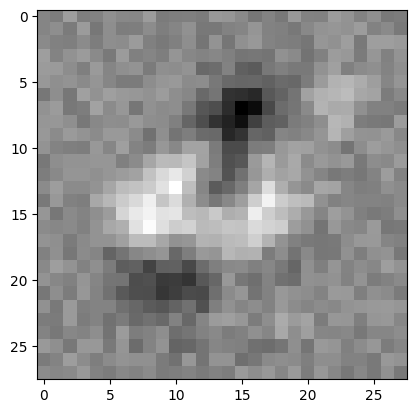

Epoch [34/100], Loss: 0.4324, Accuracy: 0.9020
weights: torch.Size([10, 784])
bias:    torch.Size([10])


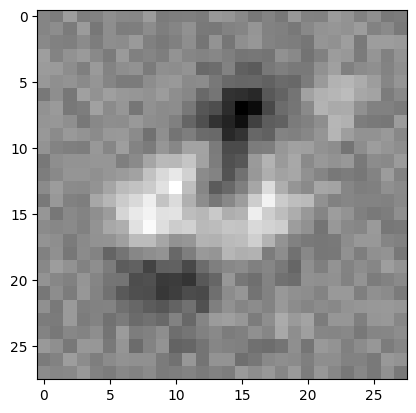

Epoch [35/100], Loss: 0.4270, Accuracy: 0.9020
weights: torch.Size([10, 784])
bias:    torch.Size([10])


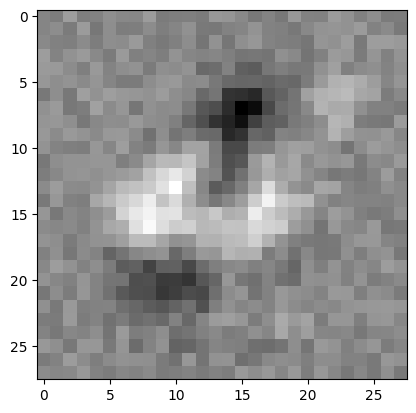

Epoch [36/100], Loss: 0.4219, Accuracy: 0.9030
weights: torch.Size([10, 784])
bias:    torch.Size([10])


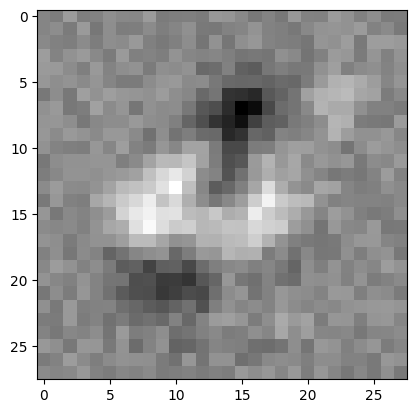

Epoch [37/100], Loss: 0.4170, Accuracy: 0.9050
weights: torch.Size([10, 784])
bias:    torch.Size([10])


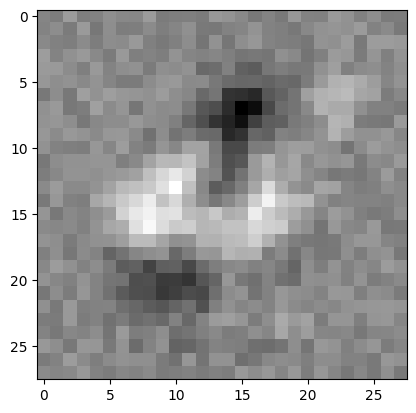

Epoch [38/100], Loss: 0.4122, Accuracy: 0.9080
weights: torch.Size([10, 784])
bias:    torch.Size([10])


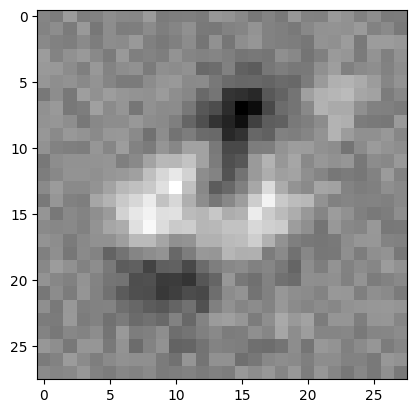

Epoch [39/100], Loss: 0.4076, Accuracy: 0.9090
weights: torch.Size([10, 784])
bias:    torch.Size([10])


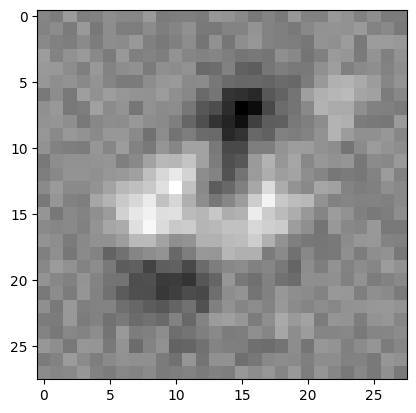

Epoch [40/100], Loss: 0.4032, Accuracy: 0.9110
weights: torch.Size([10, 784])
bias:    torch.Size([10])


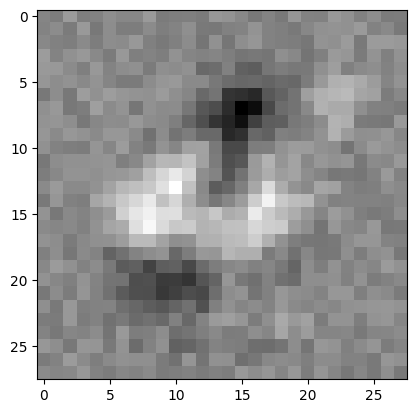

Epoch [41/100], Loss: 0.3989, Accuracy: 0.9120
weights: torch.Size([10, 784])
bias:    torch.Size([10])


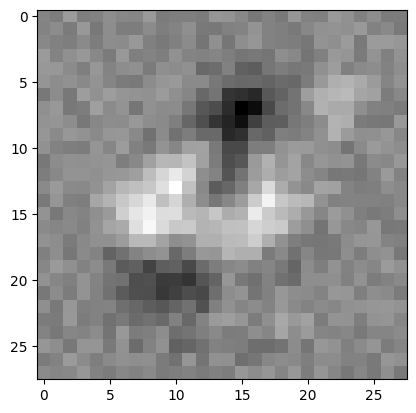

Epoch [42/100], Loss: 0.3948, Accuracy: 0.9120
weights: torch.Size([10, 784])
bias:    torch.Size([10])


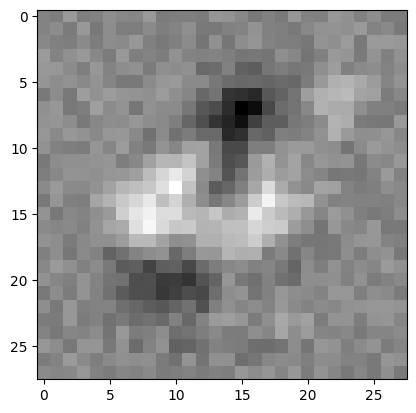

Epoch [43/100], Loss: 0.3908, Accuracy: 0.9120
weights: torch.Size([10, 784])
bias:    torch.Size([10])


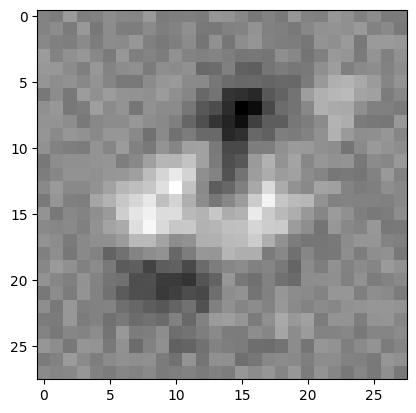

Epoch [44/100], Loss: 0.3869, Accuracy: 0.9130
weights: torch.Size([10, 784])
bias:    torch.Size([10])


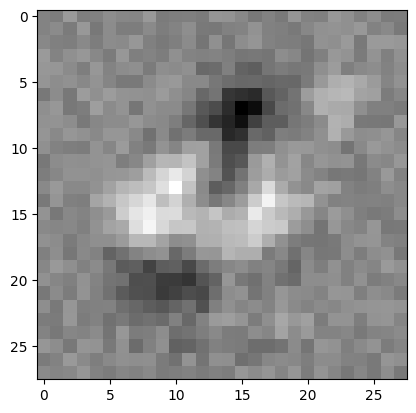

Epoch [45/100], Loss: 0.3832, Accuracy: 0.9140
weights: torch.Size([10, 784])
bias:    torch.Size([10])


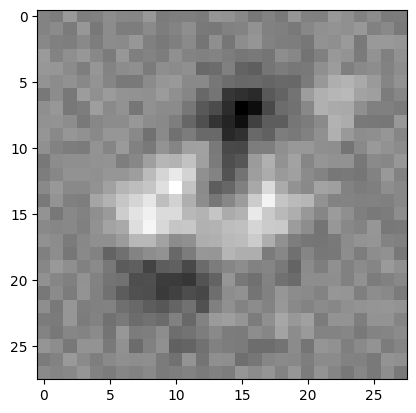

Epoch [46/100], Loss: 0.3795, Accuracy: 0.9160
weights: torch.Size([10, 784])
bias:    torch.Size([10])


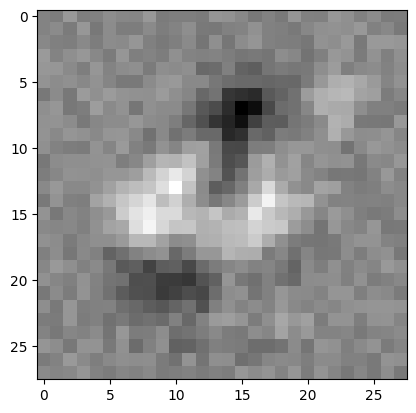

Epoch [47/100], Loss: 0.3760, Accuracy: 0.9160
weights: torch.Size([10, 784])
bias:    torch.Size([10])


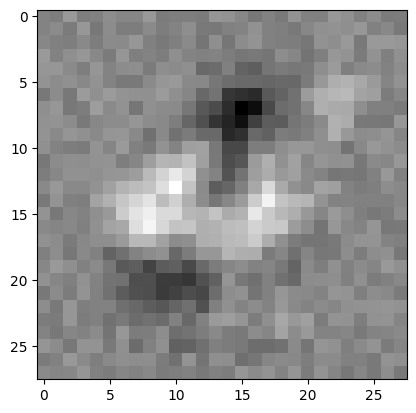

Epoch [48/100], Loss: 0.3725, Accuracy: 0.9170
weights: torch.Size([10, 784])
bias:    torch.Size([10])


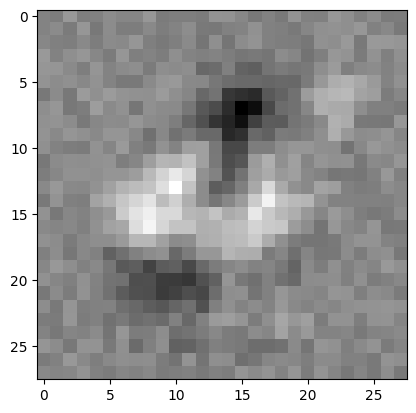

Epoch [49/100], Loss: 0.3692, Accuracy: 0.9180
weights: torch.Size([10, 784])
bias:    torch.Size([10])


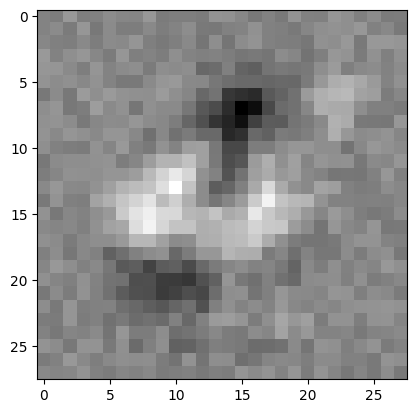

Epoch [50/100], Loss: 0.3660, Accuracy: 0.9190
weights: torch.Size([10, 784])
bias:    torch.Size([10])


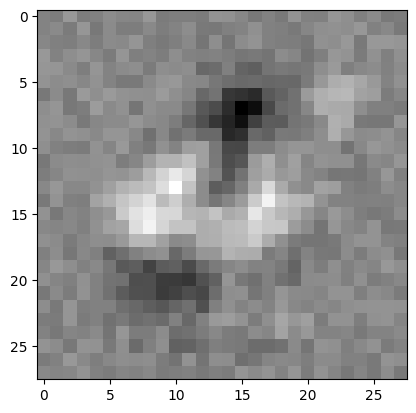

Epoch [51/100], Loss: 0.3628, Accuracy: 0.9200
weights: torch.Size([10, 784])
bias:    torch.Size([10])


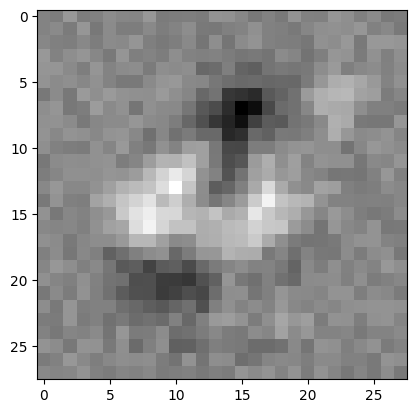

Epoch [52/100], Loss: 0.3597, Accuracy: 0.9200
weights: torch.Size([10, 784])
bias:    torch.Size([10])


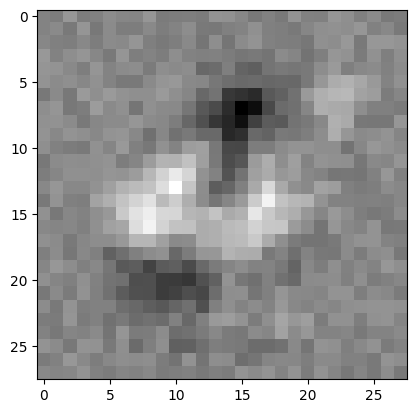

Epoch [53/100], Loss: 0.3567, Accuracy: 0.9200
weights: torch.Size([10, 784])
bias:    torch.Size([10])


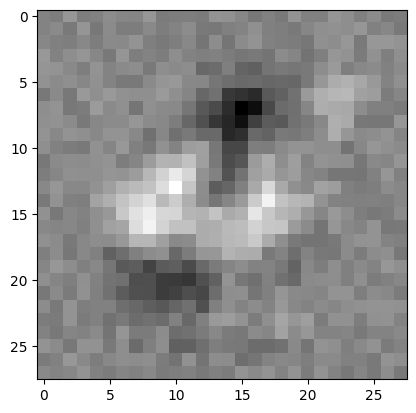

Epoch [54/100], Loss: 0.3538, Accuracy: 0.9210
weights: torch.Size([10, 784])
bias:    torch.Size([10])


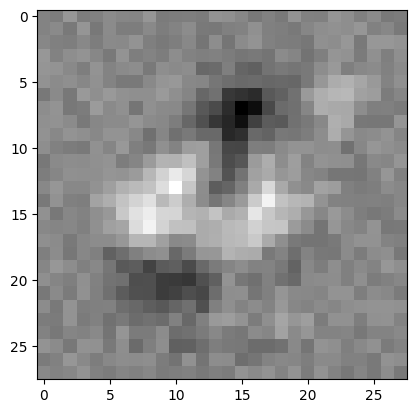

Epoch [55/100], Loss: 0.3509, Accuracy: 0.9220
weights: torch.Size([10, 784])
bias:    torch.Size([10])


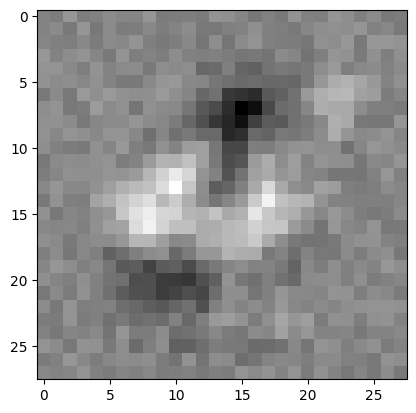

Epoch [56/100], Loss: 0.3481, Accuracy: 0.9220
weights: torch.Size([10, 784])
bias:    torch.Size([10])


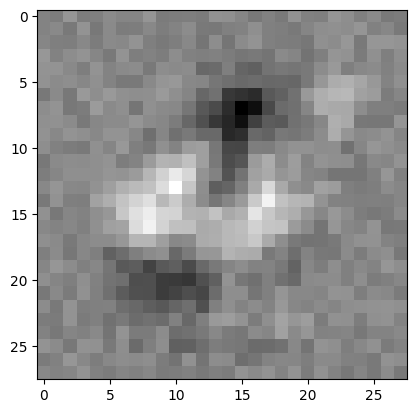

Epoch [57/100], Loss: 0.3454, Accuracy: 0.9230
weights: torch.Size([10, 784])
bias:    torch.Size([10])


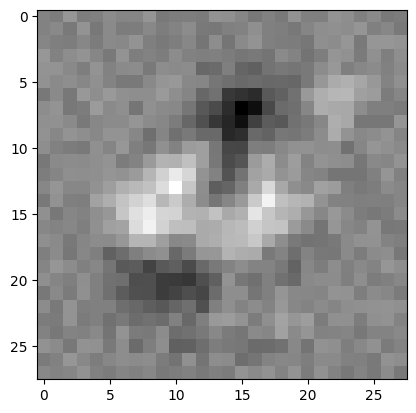

Epoch [58/100], Loss: 0.3427, Accuracy: 0.9230
weights: torch.Size([10, 784])
bias:    torch.Size([10])


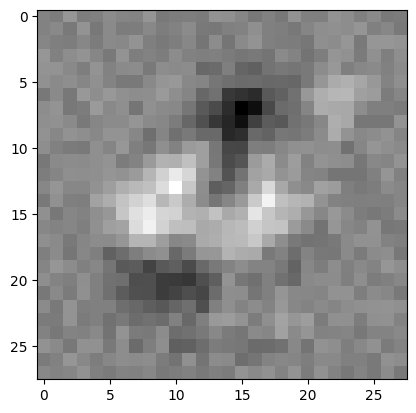

Epoch [59/100], Loss: 0.3401, Accuracy: 0.9230
weights: torch.Size([10, 784])
bias:    torch.Size([10])


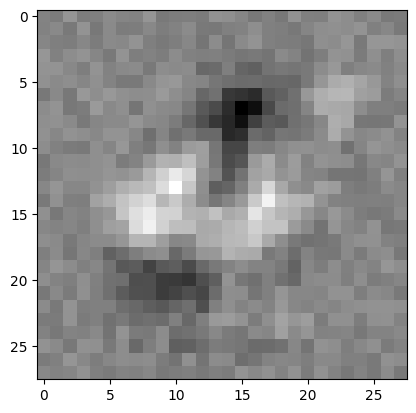

Epoch [60/100], Loss: 0.3375, Accuracy: 0.9230
weights: torch.Size([10, 784])
bias:    torch.Size([10])


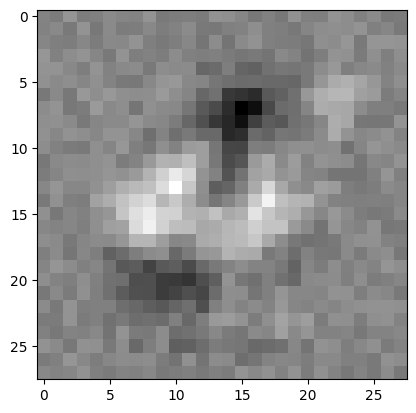

Epoch [61/100], Loss: 0.3350, Accuracy: 0.9230
weights: torch.Size([10, 784])
bias:    torch.Size([10])


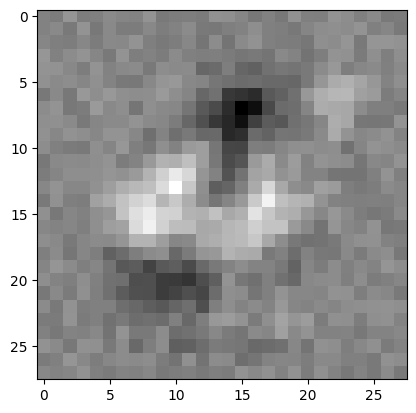

Epoch [62/100], Loss: 0.3326, Accuracy: 0.9230
weights: torch.Size([10, 784])
bias:    torch.Size([10])


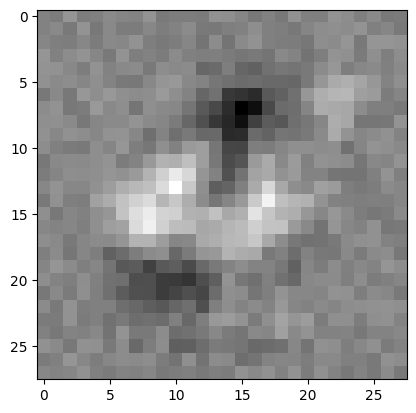

Epoch [63/100], Loss: 0.3302, Accuracy: 0.9250
weights: torch.Size([10, 784])
bias:    torch.Size([10])


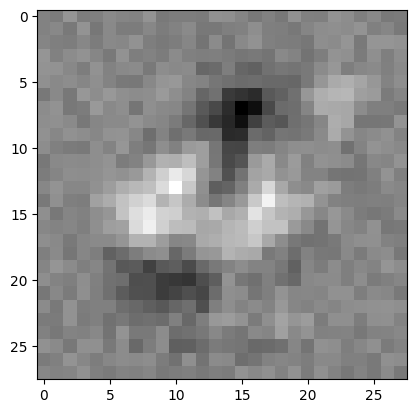

Epoch [64/100], Loss: 0.3278, Accuracy: 0.9250
weights: torch.Size([10, 784])
bias:    torch.Size([10])


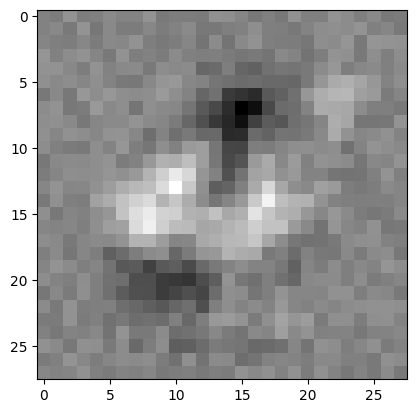

Epoch [65/100], Loss: 0.3255, Accuracy: 0.9280
weights: torch.Size([10, 784])
bias:    torch.Size([10])


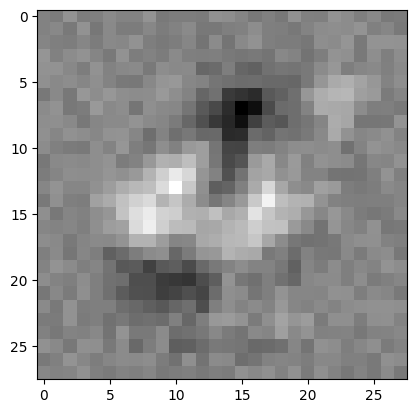

Epoch [66/100], Loss: 0.3233, Accuracy: 0.9310
weights: torch.Size([10, 784])
bias:    torch.Size([10])


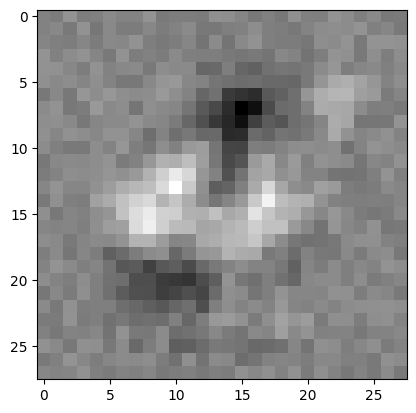

Epoch [67/100], Loss: 0.3211, Accuracy: 0.9310
weights: torch.Size([10, 784])
bias:    torch.Size([10])


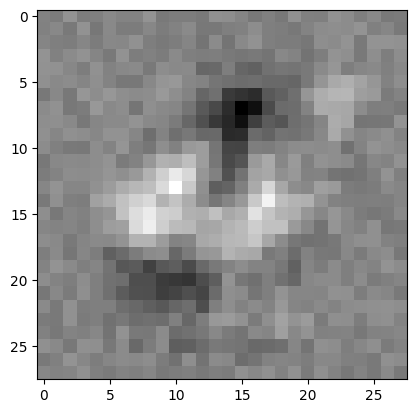

Epoch [68/100], Loss: 0.3189, Accuracy: 0.9330
weights: torch.Size([10, 784])
bias:    torch.Size([10])


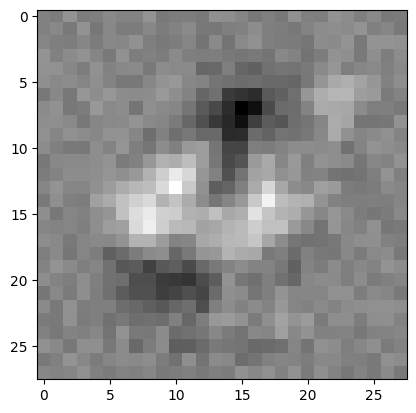

Epoch [69/100], Loss: 0.3167, Accuracy: 0.9330
weights: torch.Size([10, 784])
bias:    torch.Size([10])


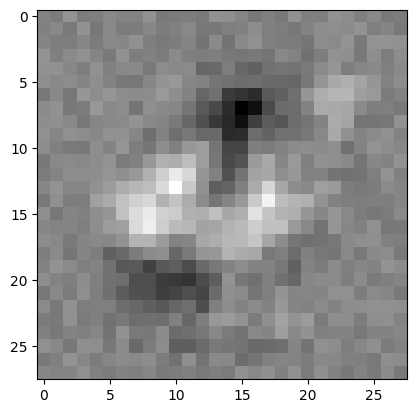

Epoch [70/100], Loss: 0.3147, Accuracy: 0.9330
weights: torch.Size([10, 784])
bias:    torch.Size([10])


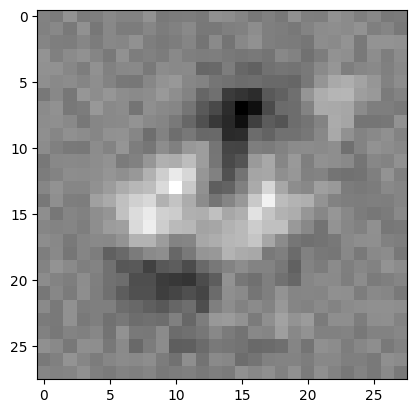

Epoch [71/100], Loss: 0.3126, Accuracy: 0.9330
weights: torch.Size([10, 784])
bias:    torch.Size([10])


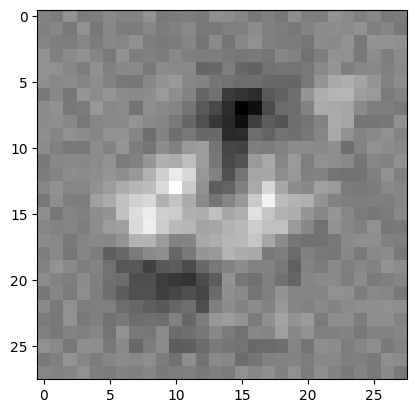

Epoch [72/100], Loss: 0.3106, Accuracy: 0.9330
weights: torch.Size([10, 784])
bias:    torch.Size([10])


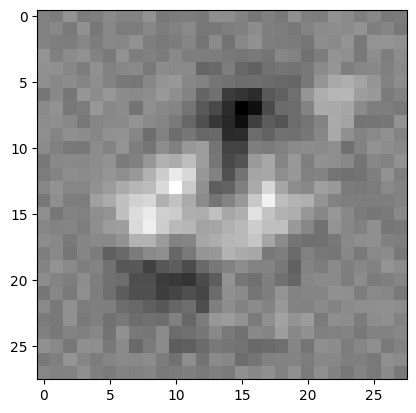

Epoch [73/100], Loss: 0.3086, Accuracy: 0.9330
weights: torch.Size([10, 784])
bias:    torch.Size([10])


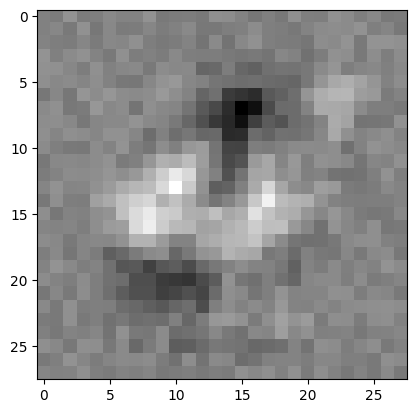

Epoch [74/100], Loss: 0.3066, Accuracy: 0.9330
weights: torch.Size([10, 784])
bias:    torch.Size([10])


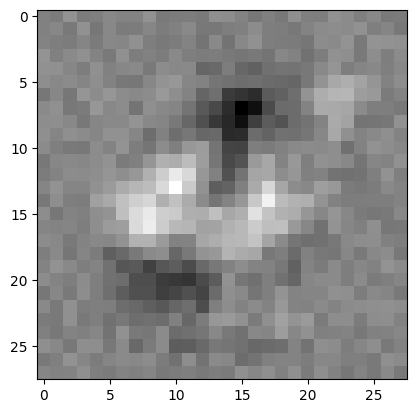

Epoch [75/100], Loss: 0.3047, Accuracy: 0.9330
weights: torch.Size([10, 784])
bias:    torch.Size([10])


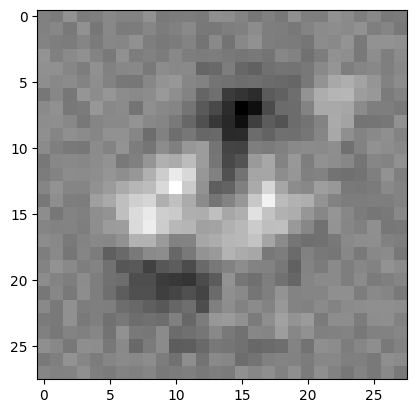

Epoch [76/100], Loss: 0.3028, Accuracy: 0.9320
weights: torch.Size([10, 784])
bias:    torch.Size([10])


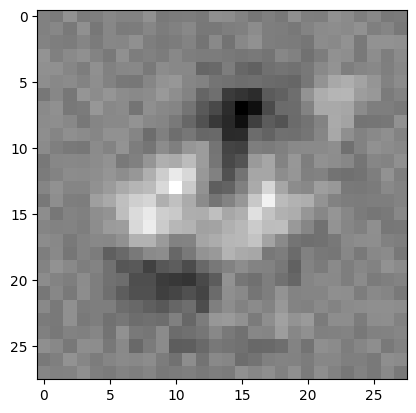

Epoch [77/100], Loss: 0.3010, Accuracy: 0.9320
weights: torch.Size([10, 784])
bias:    torch.Size([10])


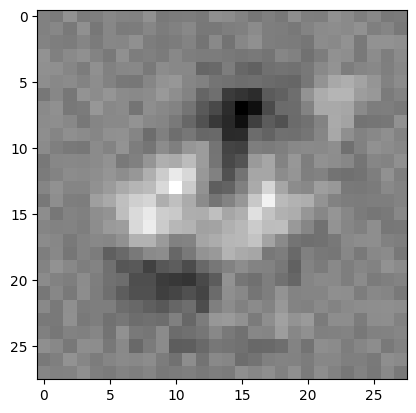

Epoch [78/100], Loss: 0.2991, Accuracy: 0.9320
weights: torch.Size([10, 784])
bias:    torch.Size([10])


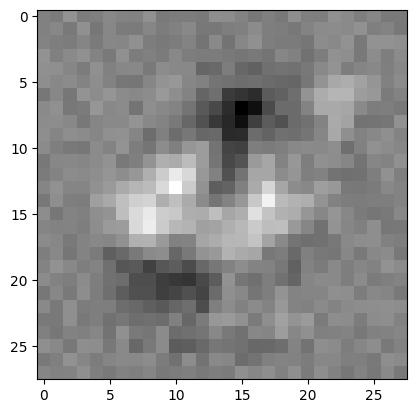

Epoch [79/100], Loss: 0.2973, Accuracy: 0.9320
weights: torch.Size([10, 784])
bias:    torch.Size([10])


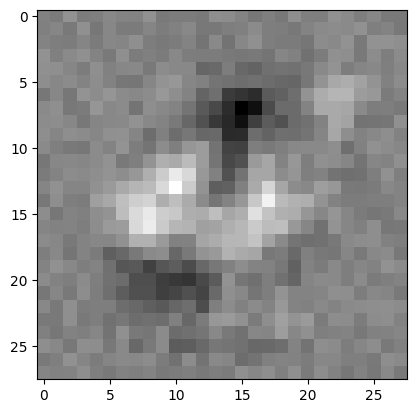

Epoch [80/100], Loss: 0.2956, Accuracy: 0.9320
weights: torch.Size([10, 784])
bias:    torch.Size([10])


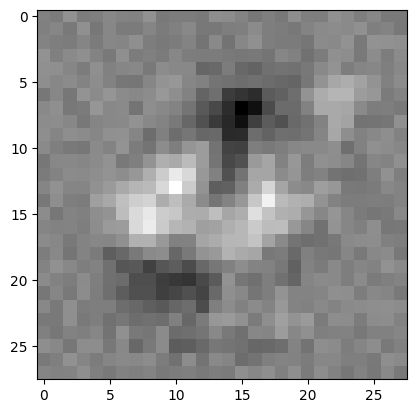

Epoch [81/100], Loss: 0.2938, Accuracy: 0.9330
weights: torch.Size([10, 784])
bias:    torch.Size([10])


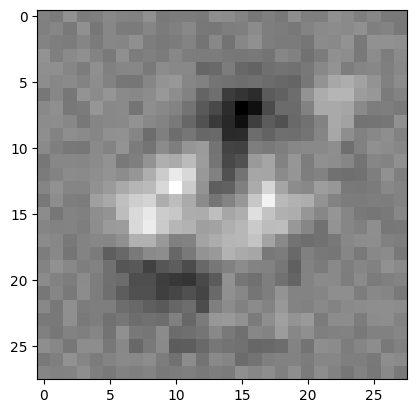

Epoch [82/100], Loss: 0.2921, Accuracy: 0.9330
weights: torch.Size([10, 784])
bias:    torch.Size([10])


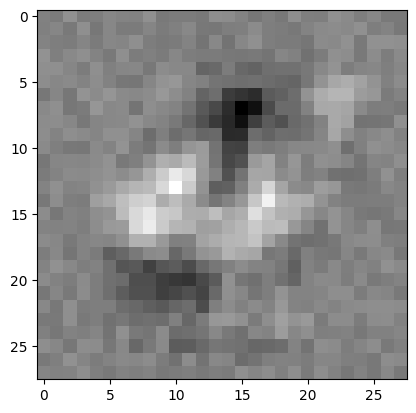

Epoch [83/100], Loss: 0.2904, Accuracy: 0.9340
weights: torch.Size([10, 784])
bias:    torch.Size([10])


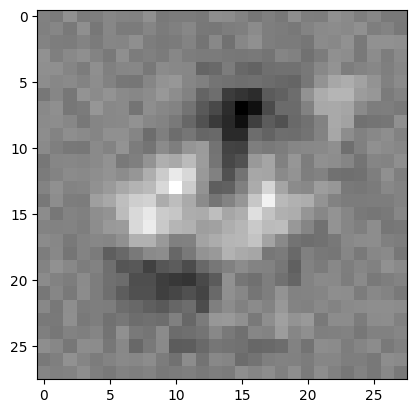

Epoch [84/100], Loss: 0.2887, Accuracy: 0.9340
weights: torch.Size([10, 784])
bias:    torch.Size([10])


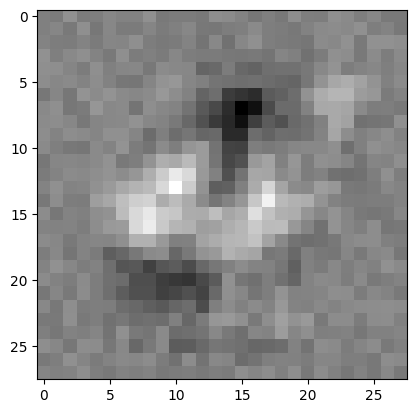

Epoch [85/100], Loss: 0.2871, Accuracy: 0.9340
weights: torch.Size([10, 784])
bias:    torch.Size([10])


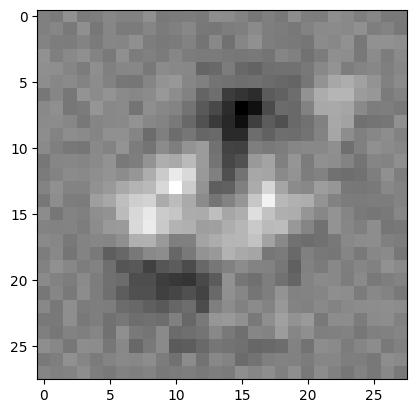

Epoch [86/100], Loss: 0.2855, Accuracy: 0.9350
weights: torch.Size([10, 784])
bias:    torch.Size([10])


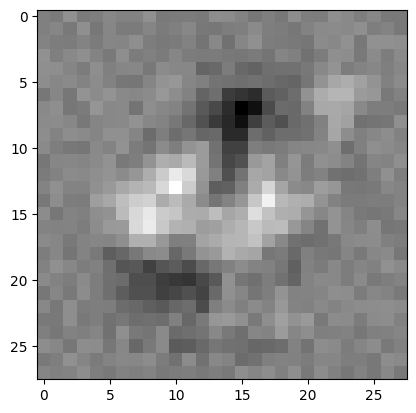

Epoch [87/100], Loss: 0.2839, Accuracy: 0.9360
weights: torch.Size([10, 784])
bias:    torch.Size([10])


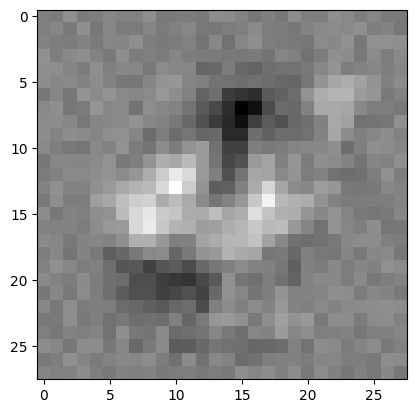

Epoch [88/100], Loss: 0.2823, Accuracy: 0.9370
weights: torch.Size([10, 784])
bias:    torch.Size([10])


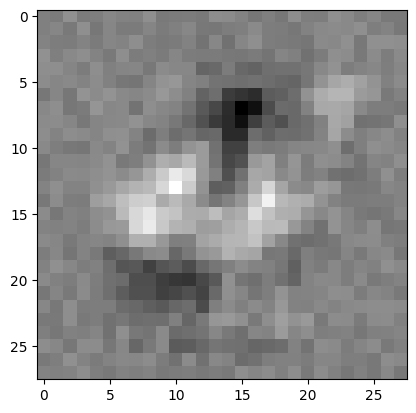

Epoch [89/100], Loss: 0.2807, Accuracy: 0.9370
weights: torch.Size([10, 784])
bias:    torch.Size([10])


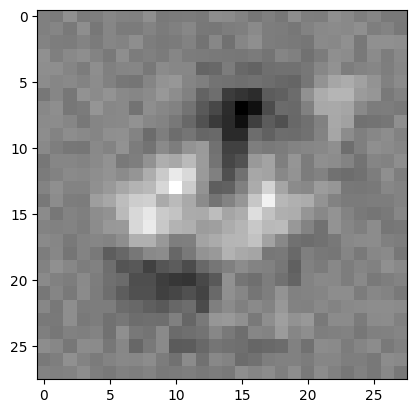

Epoch [90/100], Loss: 0.2792, Accuracy: 0.9370
weights: torch.Size([10, 784])
bias:    torch.Size([10])


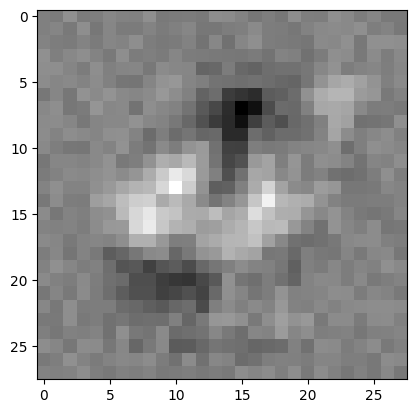

Epoch [91/100], Loss: 0.2777, Accuracy: 0.9370
weights: torch.Size([10, 784])
bias:    torch.Size([10])


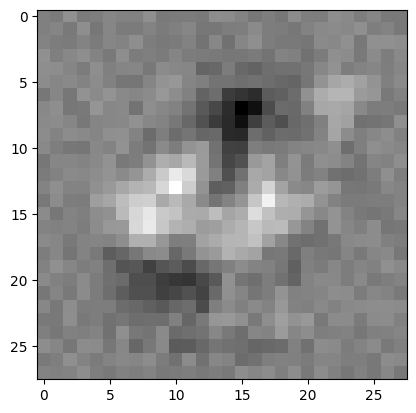

Epoch [92/100], Loss: 0.2762, Accuracy: 0.9370
weights: torch.Size([10, 784])
bias:    torch.Size([10])


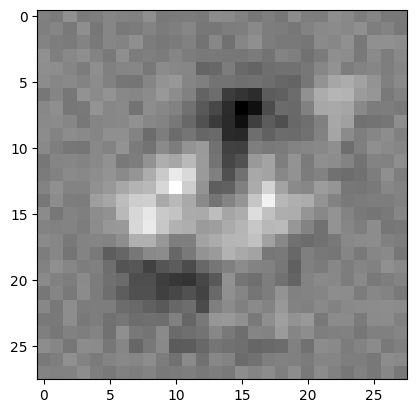

Epoch [93/100], Loss: 0.2747, Accuracy: 0.9370
weights: torch.Size([10, 784])
bias:    torch.Size([10])


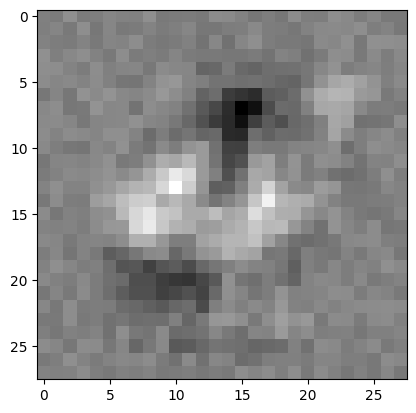

Epoch [94/100], Loss: 0.2733, Accuracy: 0.9380
weights: torch.Size([10, 784])
bias:    torch.Size([10])


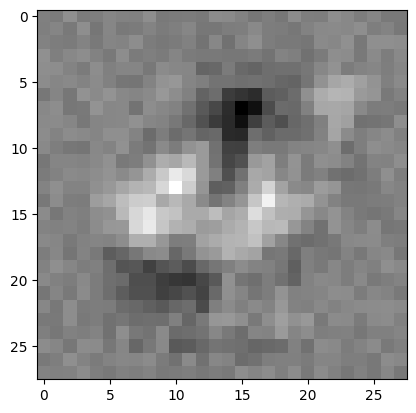

Epoch [95/100], Loss: 0.2718, Accuracy: 0.9380
weights: torch.Size([10, 784])
bias:    torch.Size([10])


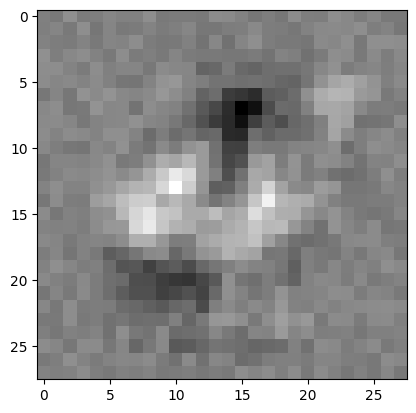

Epoch [96/100], Loss: 0.2704, Accuracy: 0.9380
weights: torch.Size([10, 784])
bias:    torch.Size([10])


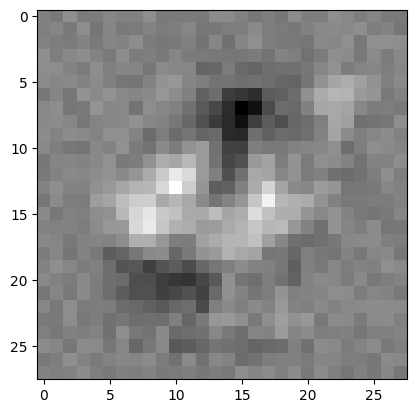

Epoch [97/100], Loss: 0.2690, Accuracy: 0.9380
weights: torch.Size([10, 784])
bias:    torch.Size([10])


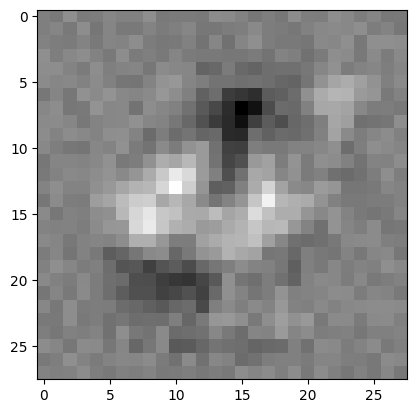

Epoch [98/100], Loss: 0.2676, Accuracy: 0.9400
weights: torch.Size([10, 784])
bias:    torch.Size([10])


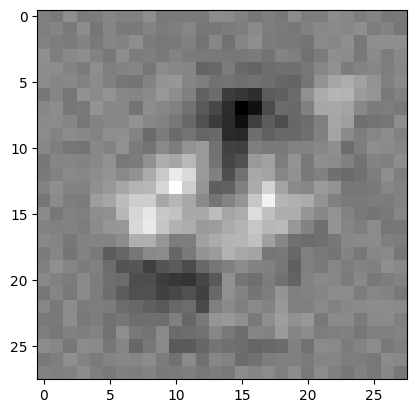

Epoch [99/100], Loss: 0.2663, Accuracy: 0.9400
weights: torch.Size([10, 784])
bias:    torch.Size([10])


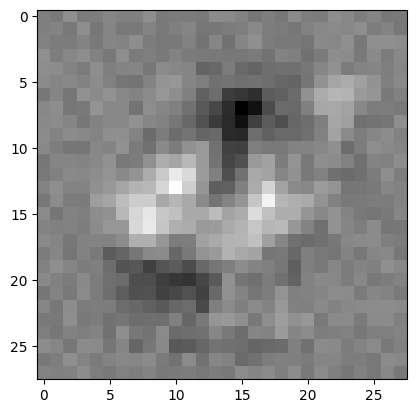

Epoch [100/100], Loss: 0.2649, Accuracy: 0.9400
weights: torch.Size([10, 784])
bias:    torch.Size([10])


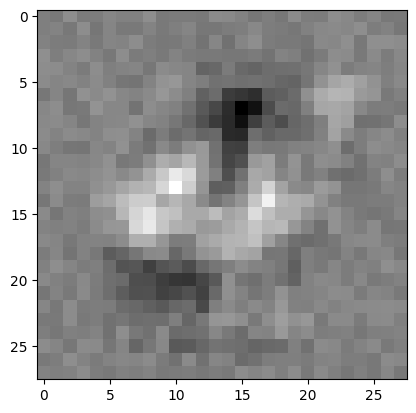

In [21]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    print(f"Epoch [{i+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()

In [22]:
print('Final loss:', loss.item())

Final loss: 0.2649323642253876


### Visualizando gráfico de perda durante o treinamento

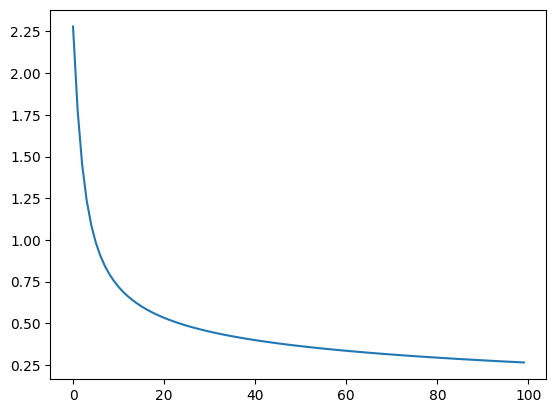

In [23]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [24]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.94


### Matriz de confusão com dados de treinamento e teste

In [25]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,2,0,0,0,2,2,1,0
2,0,1,90,1,0,1,0,1,2,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,2,1,2,0,3
5,0,2,0,1,0,81,0,0,1,1
6,1,0,1,1,2,2,90,0,1,0
7,0,1,1,1,0,0,0,111,0,3
8,0,2,2,0,0,2,0,0,82,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


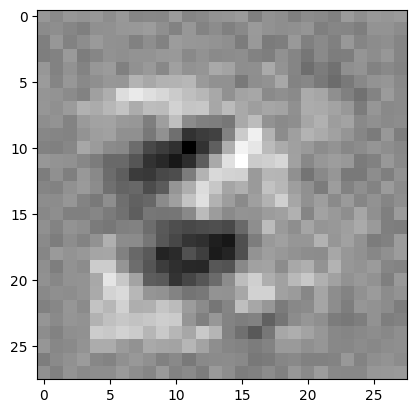

In [26]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

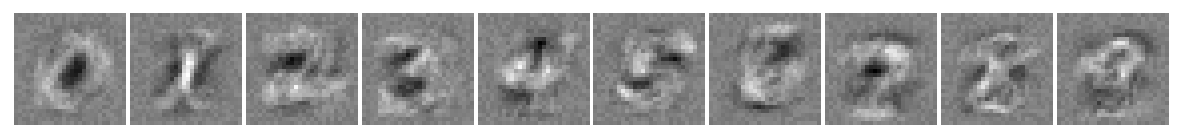

In [27]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

R.: Está implementado na parte do código de laço de treinamento

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede? R.: O shape de entranda (60000, 784)
2. Qual é o shape da saída da rede? R.: O shape de saída (60000, 10)
3. Qual é o número total de parâmetros da rede, incluindo o bias? R.: 7.850

# Aprendizados
